#     Plot altitude profile comparisons of aircraft and model data, and compare both with binned data


## Setup imports

In [1]:
import matplotlib.pyplot as plt

import notebook_prepare as pre

import warnings
#warnings.filterwarnings('ignore') #Just stops warnings from being printed... depends on audience!?

## Define plotting function

In [2]:
def plot_altitude_profile(full_df,df,plotdir,key,label,a_colour,m_colour,alt_bin,avg_method,min_method,max_method, model) :
    
    """
    Plot altitude profile comparisons of aircraft and model data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    alt_data = df['Altitude']
    
    data = pre.read_data_values(df, model)

    # Plot the data.
    plt.scatter(data['a_avg'],alt_data,s=200,c=a_colour,label='Aircraft')
        
    if(model):
        plt.scatter(data['m_avg'],alt_data,s=200,c=m_colour,label='Model')
        # Add a legend.
        plt.legend(fontsize=30,markerscale=2)

    # Set the axes labels.
    plt.xlabel(label,fontsize=50,labelpad=10)
    plt.ylabel('Altitude / m',fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    # Save the figure.
    #plt.savefig(plotdir+key+'_Altitude_Profile.png')
    #plt.close()
    plt.show()

    """
    Plot altitude profile comparisons of aircraft and model data with binned data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    data = pre.bin_altitude_data(full_df,avg_method,min_method,max_method,alt_bin, model)

    # Plot the data.
    plt.plot(data['a_avg'], data['binned'],lw=5,c=a_colour,label='Aircraft')
    plt.fill_betweenx(data['binned'], data['a_min'], data['a_max'],fc=a_colour,ec=None,alpha=0.5)
    
    if(model):
        plt.plot(data['m_avg'], data['binned'],lw=5,c=m_colour,label='Model')
        plt.fill_betweenx(data['binned'], data['m_min'], data['m_max'],fc=m_colour,ec=None,alpha=0.5)
        # Add a legend.
        plt.legend(fontsize=30,markerscale=2)

    # Set the axes labels.
    plt.xlabel(label,fontsize=50,labelpad=10)
    plt.ylabel('Altitude / m',fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    # Save the figure.
    #plt.savefig(plotdir+key+'_Altitude_Profile_Binned.png')
    #plt.close()
    plt.show()

## Specify the flight number & model data

In [3]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M302'  

# Specify whether you have model data to plot.
model = False

## Prepare the data and plot for each pollution species

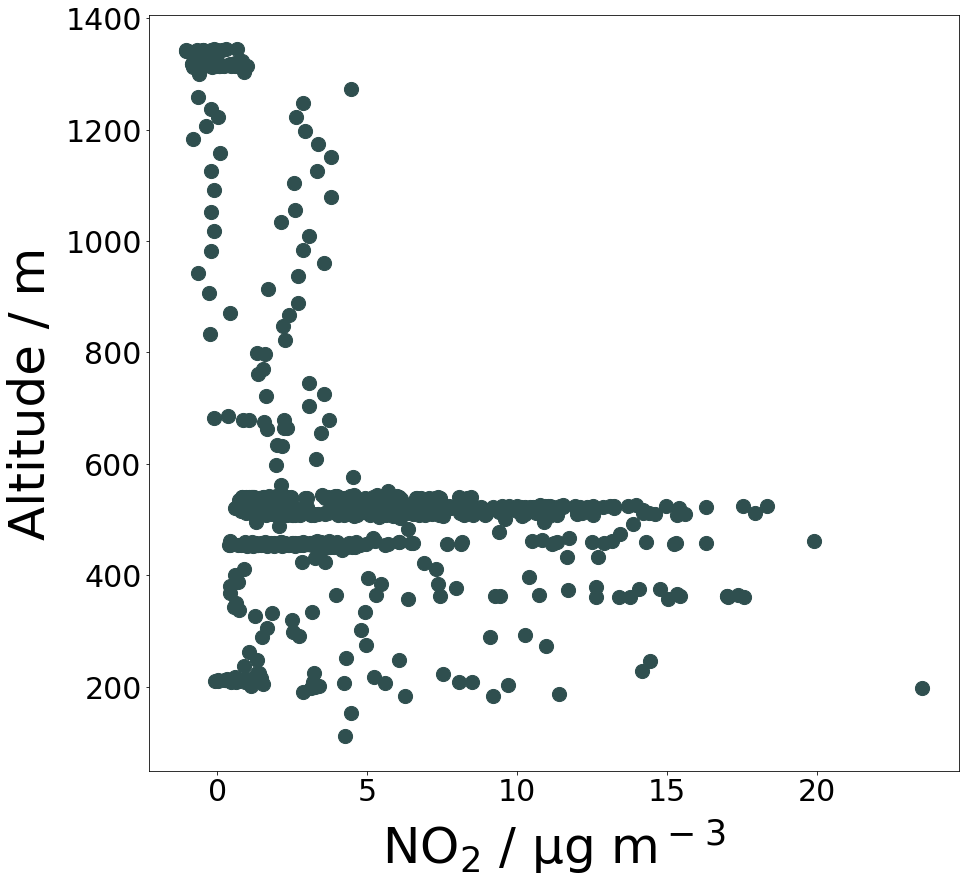

/net/data/users/twilson/cap-notebooks/new flight plots/notebook_prepare.py:205: RuntimeWarning: Mean of empty slice
  data['a_avg'].append(np.nanmean(temp_aircraft))
/opt/scitools/conda/deployments/default-2022_03_22/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


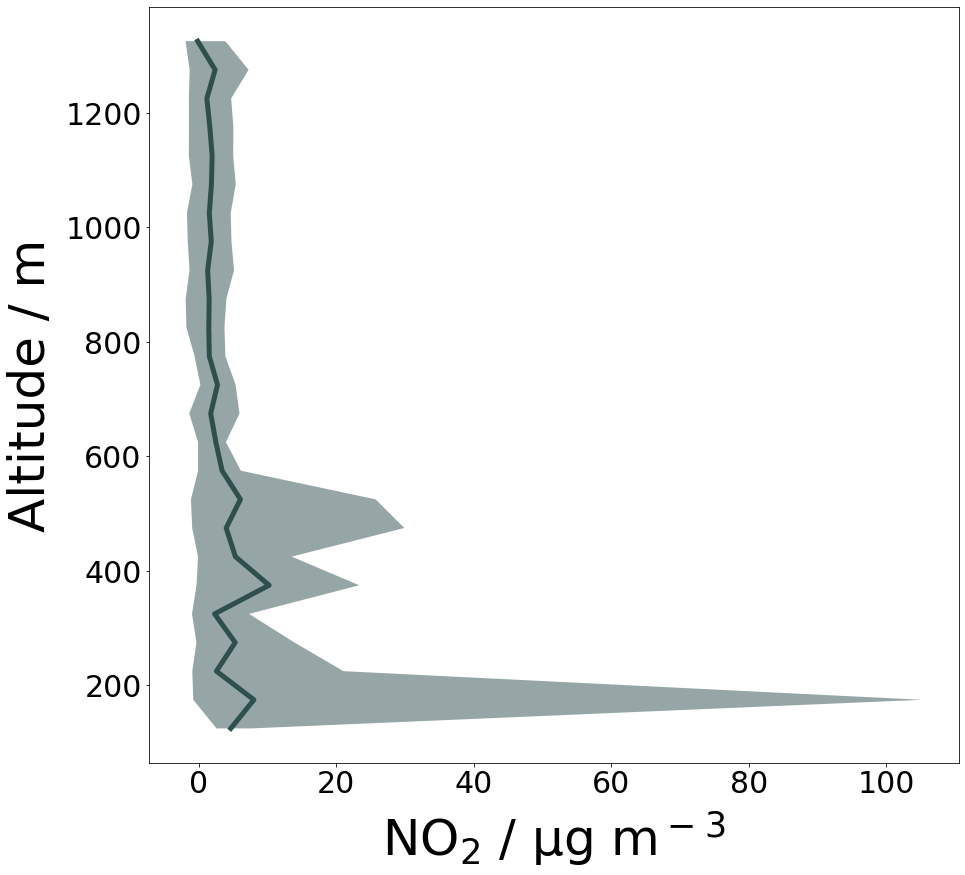

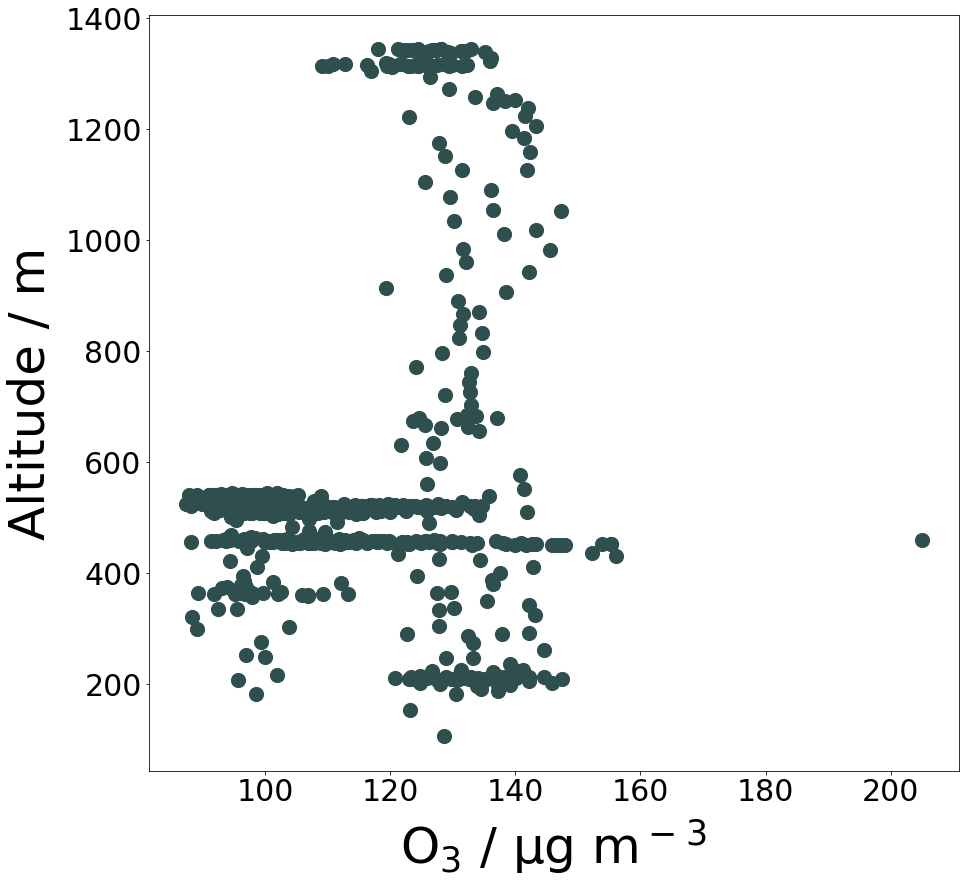

/net/data/users/twilson/cap-notebooks/new flight plots/notebook_prepare.py:205: RuntimeWarning: Mean of empty slice
  data['a_avg'].append(np.nanmean(temp_aircraft))
/opt/scitools/conda/deployments/default-2022_03_22/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


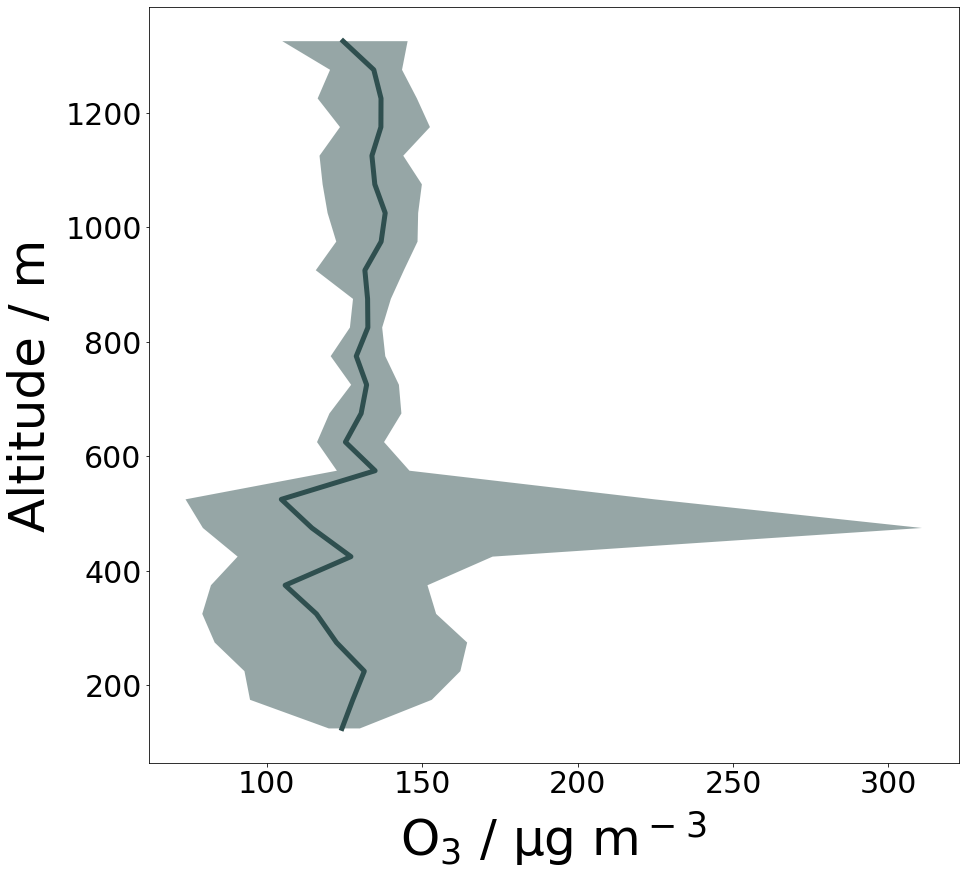

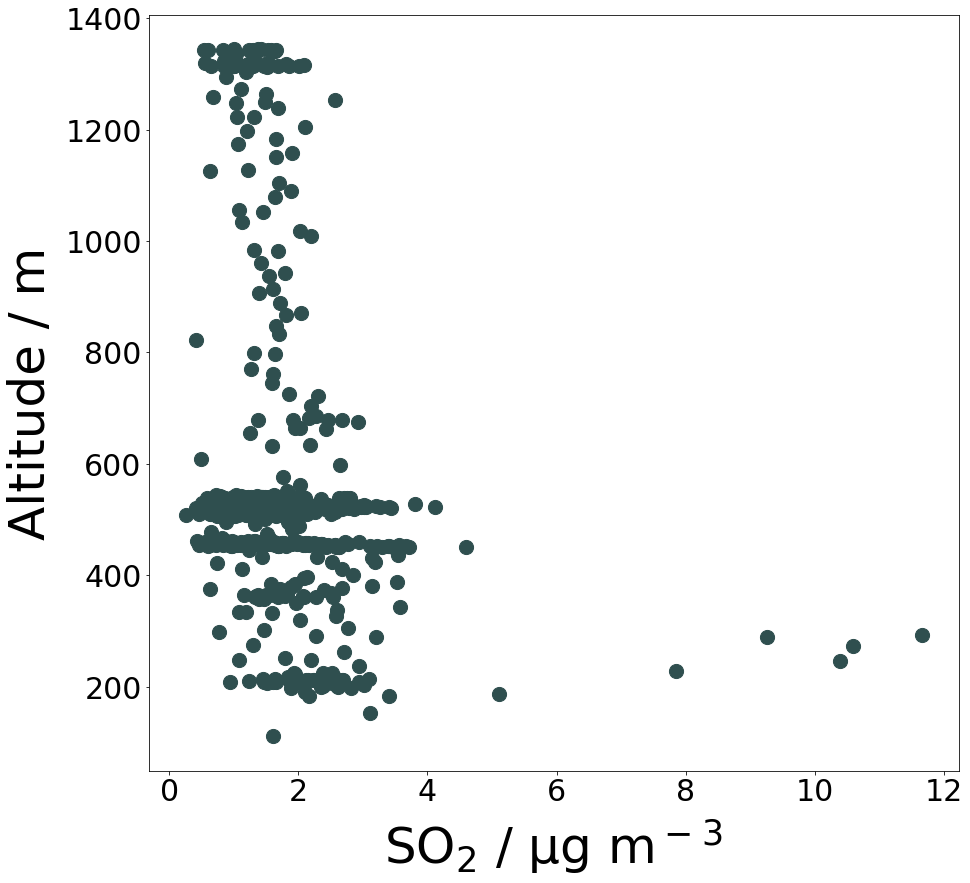

/net/data/users/twilson/cap-notebooks/new flight plots/notebook_prepare.py:205: RuntimeWarning: Mean of empty slice
  data['a_avg'].append(np.nanmean(temp_aircraft))
/opt/scitools/conda/deployments/default-2022_03_22/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


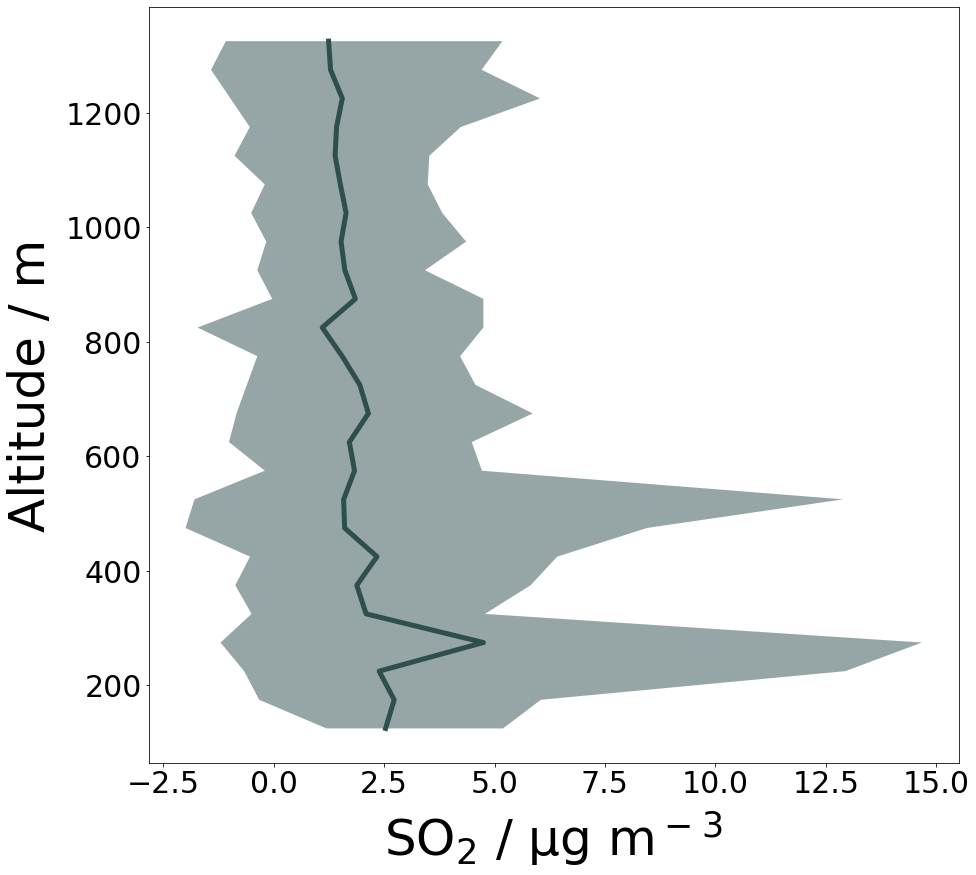

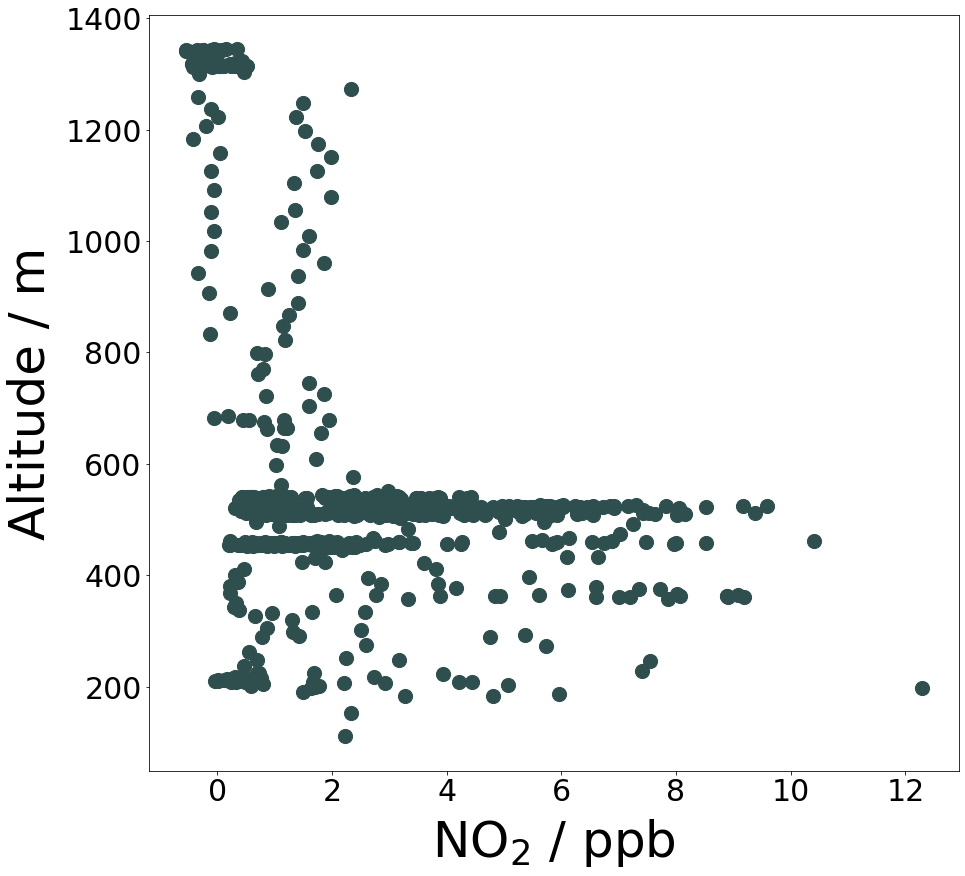

/net/data/users/twilson/cap-notebooks/new flight plots/notebook_prepare.py:205: RuntimeWarning: Mean of empty slice
  data['a_avg'].append(np.nanmean(temp_aircraft))
/opt/scitools/conda/deployments/default-2022_03_22/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


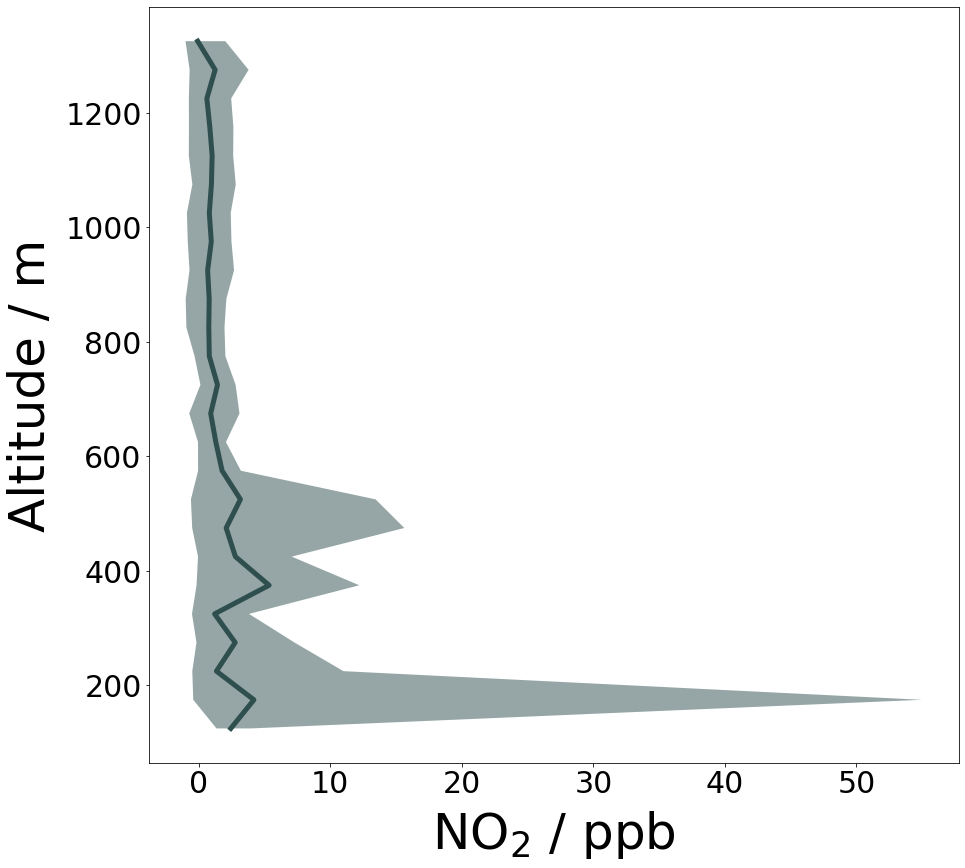

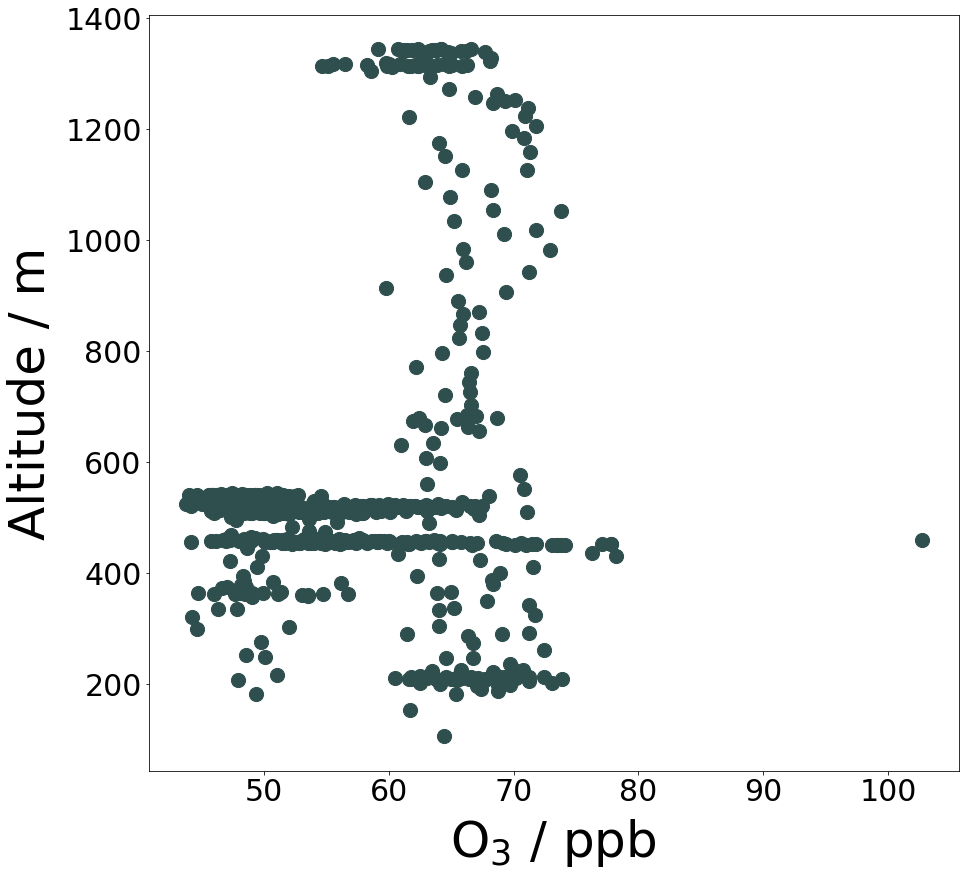

/net/data/users/twilson/cap-notebooks/new flight plots/notebook_prepare.py:205: RuntimeWarning: Mean of empty slice
  data['a_avg'].append(np.nanmean(temp_aircraft))
/opt/scitools/conda/deployments/default-2022_03_22/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


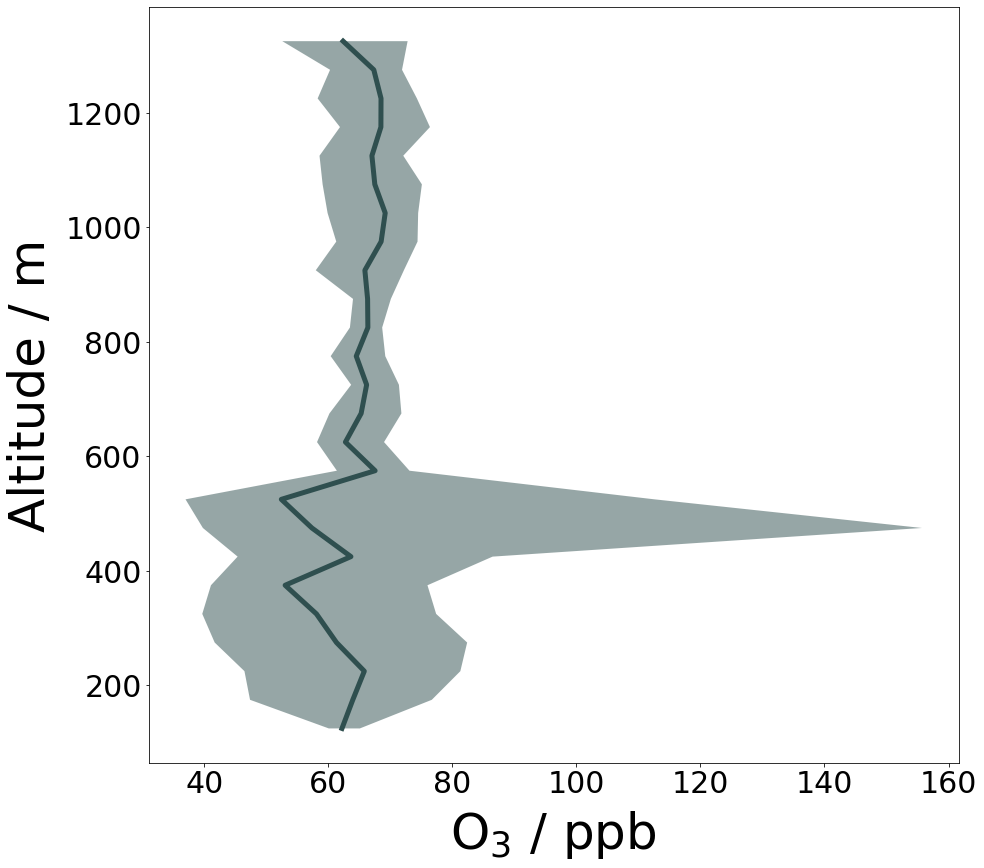

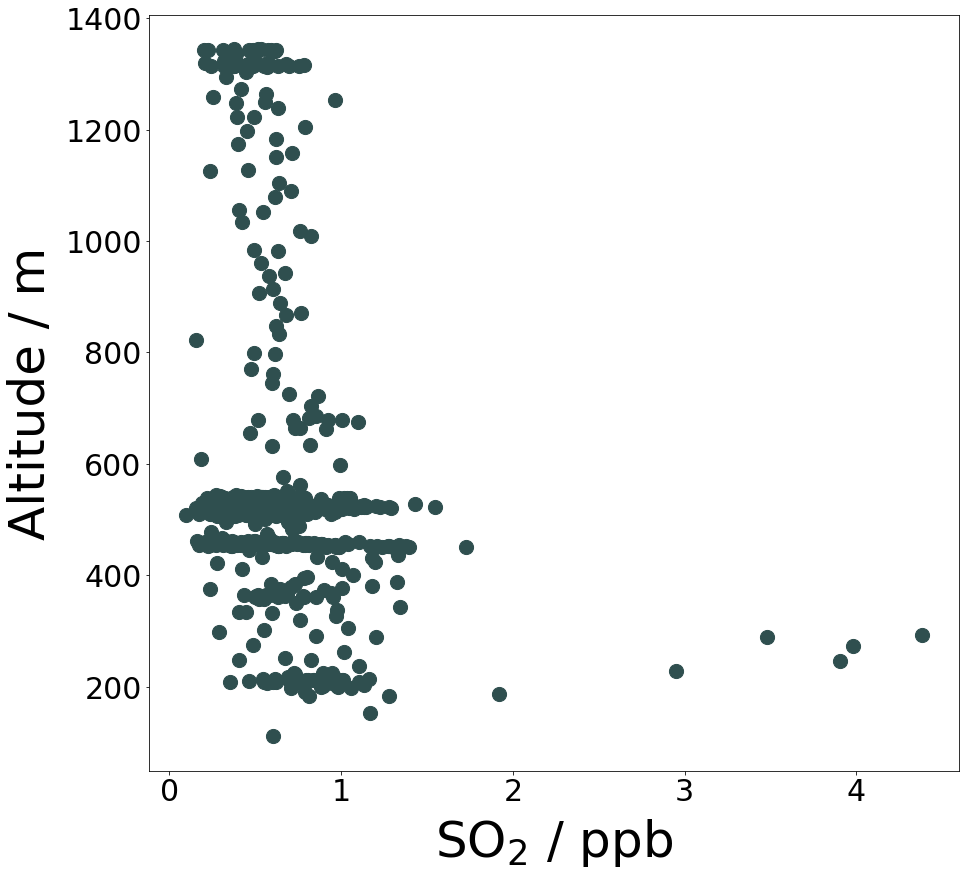

/net/data/users/twilson/cap-notebooks/new flight plots/notebook_prepare.py:205: RuntimeWarning: Mean of empty slice
  data['a_avg'].append(np.nanmean(temp_aircraft))
/opt/scitools/conda/deployments/default-2022_03_22/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


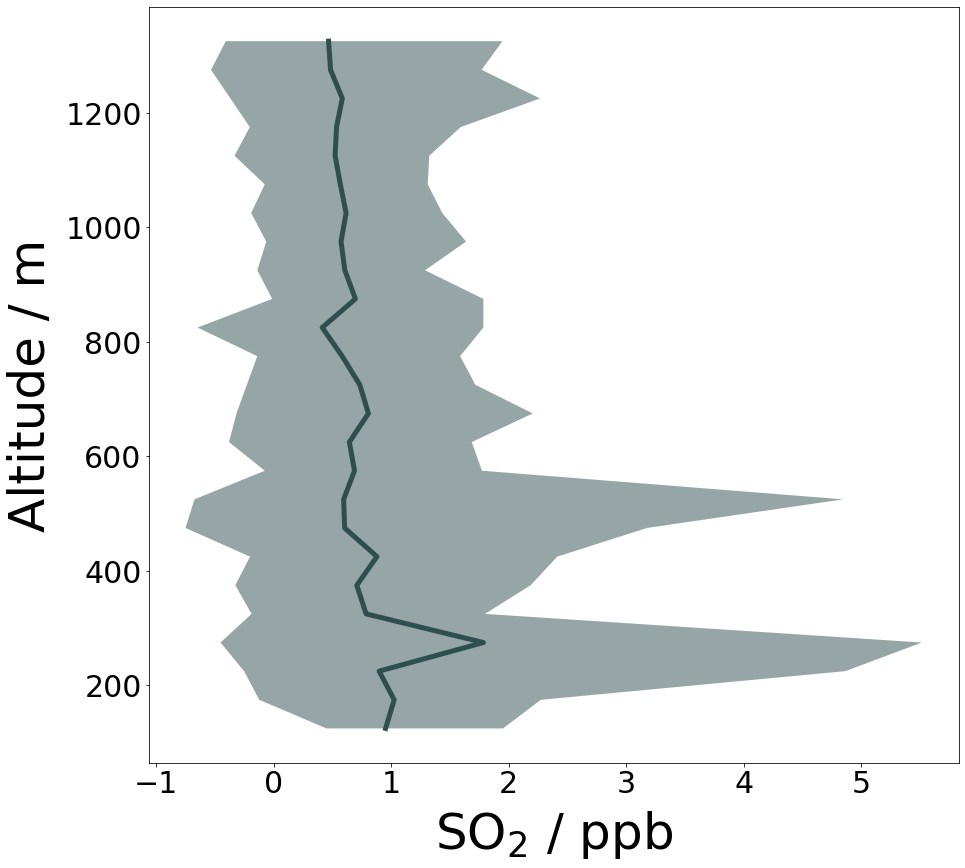

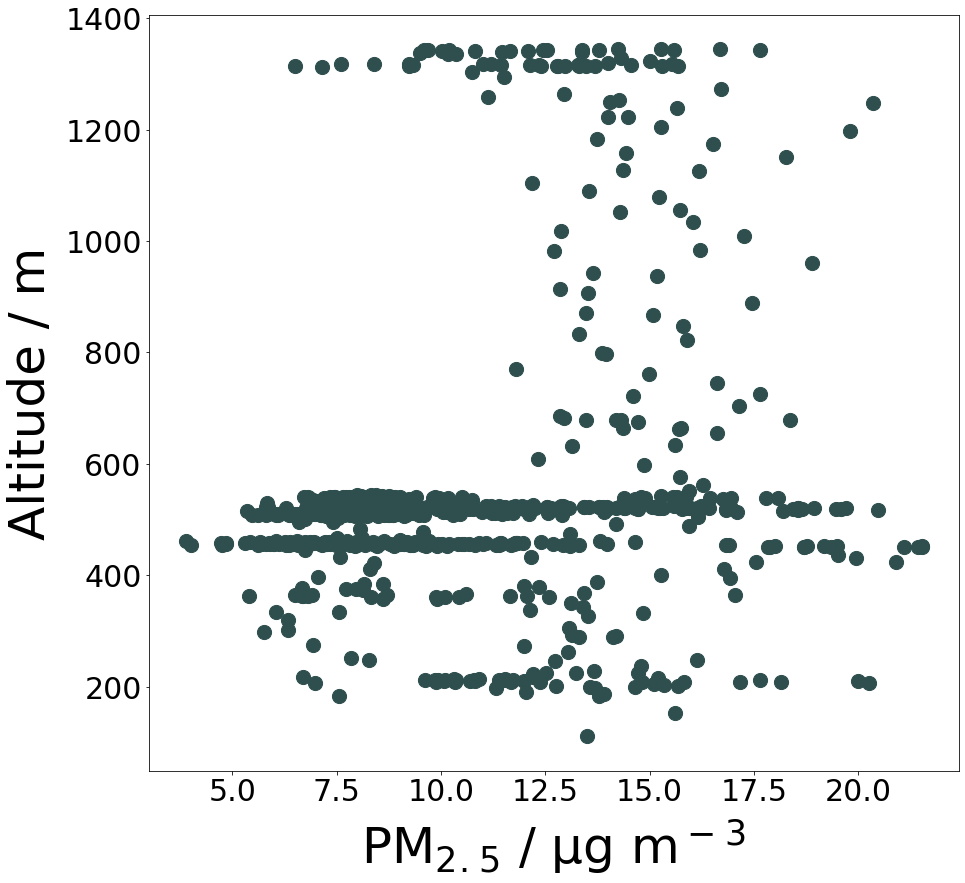

/net/data/users/twilson/cap-notebooks/new flight plots/notebook_prepare.py:205: RuntimeWarning: Mean of empty slice
  data['a_avg'].append(np.nanmean(temp_aircraft))
/opt/scitools/conda/deployments/default-2022_03_22/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


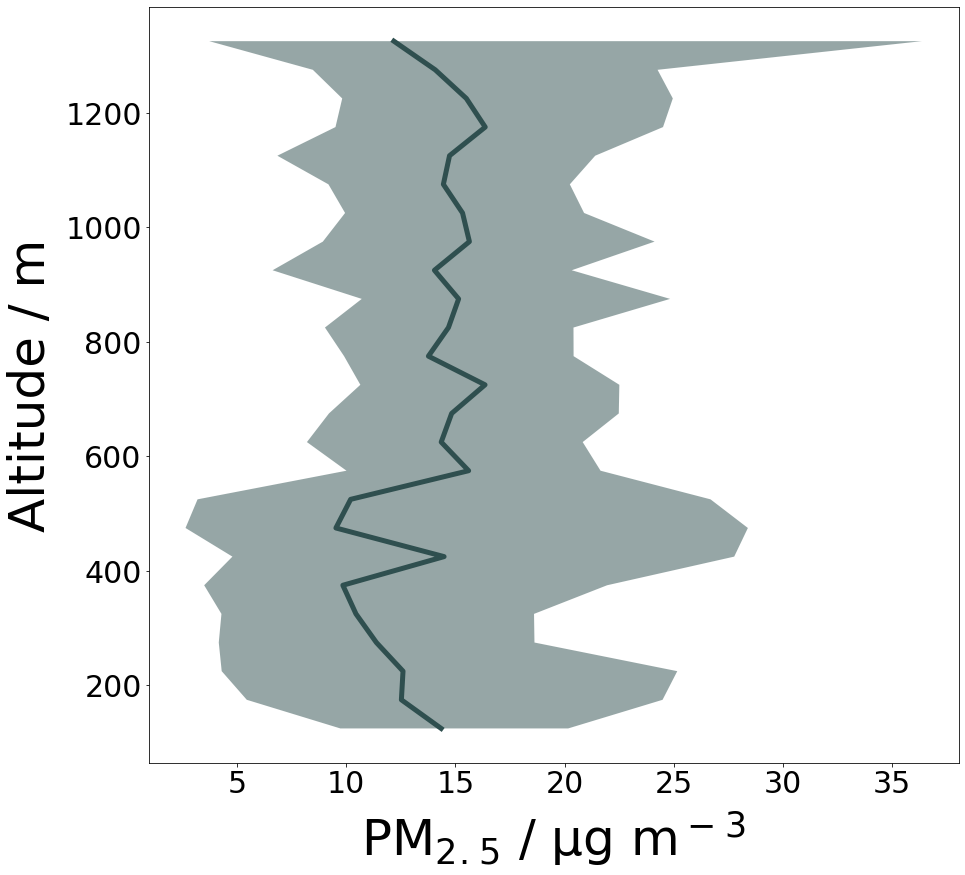

In [4]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number, model) 
optns = setup[4]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)
        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'], model) 
    
    plot_altitude_profile(df,resample_df,setup[5],key,label,optns['a_colour'],optns['m_colour'],optns['alt_bin'],optns['avg_method'],optns['min_method'],optns['max_method'], model)